# HTTP 1.0 & HTTP 1.1 Header Parser

O objetivo do automato finito é fazer a validação dos cabeçalhos de requisição do protocolo HTTP nas versões 1.0 e 1.1 conforme especicado nas RFC's [1945](https://www.rfc-editor.org/rfc/rfc1945) e [2616](https://www.rfc-editor.org/rfc/rfc2616) respectivamente.

Importante destacar que a RFC define as práticas ideais que os serviços Web devem aderir para poder trabalhar com esses protocolos, porém cada implementação pode não seguir todos as especificações. Um exemplo é o carriage return `\r`, a RFC define que cada nova linha deve ser definida com a seguência de caracteres `\r\n`, porém na implementação dos principais servidores Web (Apache, Nginx, etc.) a presença do caracter `\r` é facultativo.

Dessa forma, o automato irá implementar o definido nas RFC's, contudo em testes práticos em servidores web podem haver divergências.

## Objetivo

Uma requisição HTTP pode passar diversos cabeçalhos. Por exemplo, ao acessar o site da [UFABC](https://www.ufabc.edu.br) são enviados os seguintes cabeçalhos:

```
GET / HTTP/1.1
Host: www.ufabc.edu.br
User-Agent: Mozilla/5.0 (X11; Linux x86_64; rv:109.0) Gecko/20100101 Firefox/115.0
Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,*/*;q=0.8
Accept-Language: pt-BR,pt;q=0.8,en-US;q=0.5,en;q=0.3
Accept-Encoding: gzip, deflate, br
Referer: https://www.google.com/
Connection: keep-alive
Cookie: _ga=GA1.1.320516510.1625328328; _ga_C810D482LG=GS1.1.1707175485.6.1.1707176104.60.0.0; _ga_21H450NGNH=GS1.3.1695872057.4.0.1695872057.0.0.0
Upgrade-Insecure-Requests: 1
Sec-Fetch-Dest: document
Sec-Fetch-Mode: navigate
Sec-Fetch-Site: cross-site
Sec-Fetch-User: ?1
Pragma: no-cache
Cache-Control: no-cache
```

Porém os dados que são obrigatórios na requisição `HTTP/1.0` é apenas o o método da requisição, o local de destino e a versão do protocolo. Por exemplo:
```
GET /my-path HTTP/1.0
```

Já na versão `HTTP/1.1` passa a ser obrigatório também o cabeçalho `Host`. No caso do primeiro exemplo:
```
GET / HTTP/1.1
Host: www.ufabc.edu.br
```

## Dependências

Inicialmente devemos instalar as dependências do projeto que será implementado utilizando `python 3`.

A biblioteca `automathon` deve ser instalado utilizando o comando `pip`

In [1]:
!pip install automathon --upgrade

/usr/lib/python3/dist-packages/secretstorage/dhcrypto.py:15: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/usr/lib/python3/dist-packages/secretstorage/util.py:19: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py) ... done
  Created wheel for automathon: filename=automathon-0.0.13-py3-none-any.whl size=18929 sha256=b8ee4854975fa8f3146a6db85fd0b7244c90d98c7b3ecf2570672074a637f4b1
  Stored in directory: /home/felipe/.cache/pip/wheels/fd/42/c6/2b218ac52d99327eb9b31775b61befc69bbf070190516fea5e
Successfully built automathon


Caso o projeto esteja sendo executado localmente e a visualização do automato não esteja sendo possível de ser apresentada, pode ser necessário instalar `graphviz`. No caso de sistemas Linux baseados em pacotes `.deb` isso pode ser feito executando no terminal.

```bash
sudo apt install graphviz
```

## Automato

Inicialmente definimos um automato finito não determinístico, de estado inicial `q1` e estado final `qf`.

A quantidade de estados definidos na variável `q` será acrescida conforme forem apresentadas as lógicas de cada transição para um melhor entendimento.

O alfabeto `sigma` do automato é o conjunto de caracteres alfanuméricos e os carecteres `-`, ` `, `\r`, `\n`, `.`, `:`, `-`, `/`

As transições de estados `delta` será complemetada conforme a lógica for explicada, assim como os estados `q`.

In [51]:
from automathon import NFA

# Criação da estrutura set em python de forma mais prática
alphanumeric = set("0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ")
special_symbols = set("-\r\n.:/* (;)=_,+?")

# Dessa maneira concatenamos as duas estruturas set no nosso alfabeto sigma
sigma = alphanumeric.union(special_symbols)

Q = {'q0', 'qf'}
delta = {}
initial_state = 'q0'
f = {'qf'}

print("Alfabeto: {}".format(sigma))

Alfabeto: {'M', 'W', 'F', 'T', 'R', 't', '0', 'v', 'o', '9', 'n', 'I', 'h', 'O', 'A', '\n', 's', '/', 'Q', 'V', '1', 'r', 'i', 'q', 'C', ':', 'e', ' ', '-', 'u', '.', 'E', '*', 'y', '\r', 'Y', '7', 'k', 'D', 'J', '4', 'N', 'a', 'm', 'B', 'p', 'U', 'X', 'H', 'g', 'L', 'w', 'f', 'b', 'l', 'j', 'c', '6', 'G', 'S', 'x', '2', 'K', 'Z', '8', 'P', '3', 'd', 'z', '5'}


Primeira etapa é definir as transações dos métodos HTTP.

Os métodos são: `OPTIONS`, `GET`, `HEAD`, `POST`, `PUT`, `TRACE`, `DELETE`

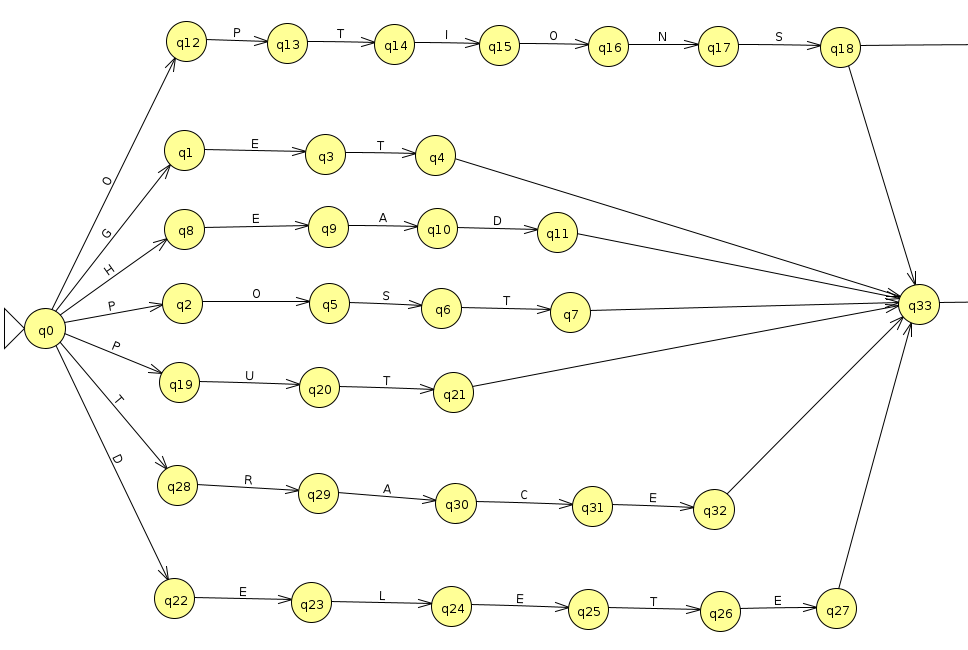

In [52]:
delta['q0'] = {
    'O':{'q12'},
    'G':{'q1'},
    'H':{'q8'},
    'P':{'q2','q19'},
    'T':{'q28'},
    'D':{'q22'}
}

# OPTIONS
delta['q12'] = {
    'P': {'q13'}
}
delta['q13'] = {
    'T': {'q14'}
}
delta['q14'] = {
    'I': {'q15'}
}
delta['q15'] = {
    'O': {'q16'}
}
delta['q16'] = {
    'N': {'q17'}
}
delta['q17'] = {
    'S': {'q18'}
}
delta['q18'] = {
    ' ': {'q33', 'q35'}
}

# GET
delta['q1'] = {
    'E': {'q3'}
}
delta['q3'] = {
    'T': {'q4'}
}
delta['q4'] = {
    ' ': {'q33'}
}

# HEAD
delta['q8'] = {
    'E': {'q9'}
}
delta['q9'] = {
    'A': {'q10'}
}
delta['q10'] = {
    'D': {'q11'}
}
delta['q11'] = {
    ' ': {'q33'}
}

# POST
delta['q2'] = {
    'O': {'q5'}
}
delta['q5'] = {
    'S': {'q6'}
}
delta['q6'] = {
    'T': {'q7'}
}
delta['q7'] = {
    ' ': {'q33'}
}

# PUT
delta['q19'] = {
    'U': {'q20'}
}
delta['q20'] = {
    'T': {'q21'}
}
delta['q21'] = {
    ' ': {'q33'}
}

# TRACE
delta['q28'] = {
    'R': {'q29'}
}
delta['q29'] = {
    'A': {'q30'}
}
delta['q30'] = {
    'C': {'q31'}
}
delta['q31'] = {
    'E': {'q32'}
}
delta['q32'] = {
    ' ': {'q33'}
}

# DELETE
delta['q22'] = {
    'E': {'q23'}
}
delta['q23'] = {
    'L': {'q24'}
}
delta['q24'] = {
    'E': {'q25'}
}
delta['q25'] = {
    'T': {'q26'}
}
delta['q26'] = {
    'E': {'q27'}
}
delta['q27'] = {
    ' ': {'q33'}
}

Depois do método HTTP é necessário informar o destino. O destino é uma sequência de caracteres que informam o conteúdo que será acessado. Usualmente são no formato `/path/do/conteudo`, mas também é possível especificar o destino por completo `www.meu-site.com/path/do/conteudo` O método OPTION também pode aceitar um único caracter `*` como destino.

**Obs.** a notação `[a-zA-Z0-9/.-]` representa todos os caracteres de `a` a `z` incluindo maiúsculo e minúsculo, de `0` a `9` e os caracteres `/`, `.`, `-`. Essa notação apesar de ser comumemente usada em linguagens de programação, no contexto de automatos não é a maneira mais precisa de se utilizar, foi feito o uso nessa imagem apenas por ser mais compacta.
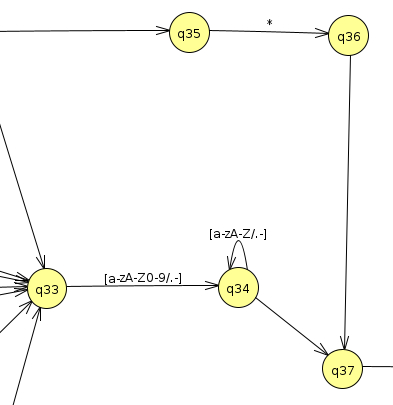

In [54]:
delta['q35'] = {
    '*' : {'q36'}
}

delta['q36'] = {
    ' ': {'q37'}
}

# Estrutura para definir todas as transições de maneira reduzida
characters = set("0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ/.-")
t_q33 = {}
t_q34 = {}
for c in characters:
    t_q33[c] = {'q34'}
    t_q34[c] = {'q34'}

t_q34[' '] = {'q37'}
delta['q33'] = t_q33
delta['q34'] = t_q34


Como última informação da linha inicial, é especificado a versão HTTP do protocolo, no caso sendo `1.0` ou `1.1`. Nessa implementação o uso do caracter `\r` é facultativa, mesmo a RFC especificando o uso desse caracter, a maioria dos servidores Web do mercado aderem o `\r` como opcional.

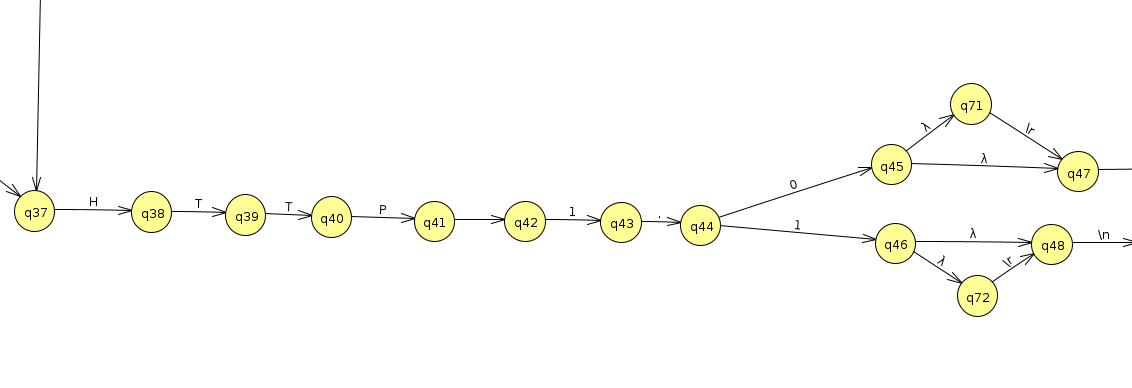

In [55]:
# HTTP
delta['q37'] = {
    'H': {'q38'}
}
delta['q38'] = {
    'T': {'q39'}
}
delta['q39'] = {
    'T': {'q40'}
}
delta['q40'] = {
    'P': {'q41'}
}
delta['q41'] = {
    '/': {'q42'}
}

# Versões
delta['q42'] = {
    '1': {'q43'}
}
delta['q43'] = {
    '.': {'q44'}
}
delta['q44'] = {
    '0': {'q45'},
    '1': {'q46'}
}

delta['q45'] = {
    '': {'q71', 'q47'}
}
delta['q71'] = {
    '\r': {'q47'}
}


delta['q46'] = {
    '': {'q72', 'q48'},
}
delta['q72'] = {
    '\r': {'q48'}
}



Caso seja optado por utilizar o `HTTP/1.0`, as demais linhas de cabeçalhos são facultativos e devem seguir o formato `cabecalho: valor`. Caso seja optado o `HTTP/1.1` é obrigatório a especificação do cabeçalho `Host` que é `case insensitive` e pode ou não ter uma porta especificada de até 5 digitos, demais cabeçalhos são facultativos.

A requisição é finalizada com o envio de dois caracteres sucessivos `\n`.

Área superior se refere ao protocolo `HTTP/1.0` enquanto a área abaixo ao `HTTP/1.1`.
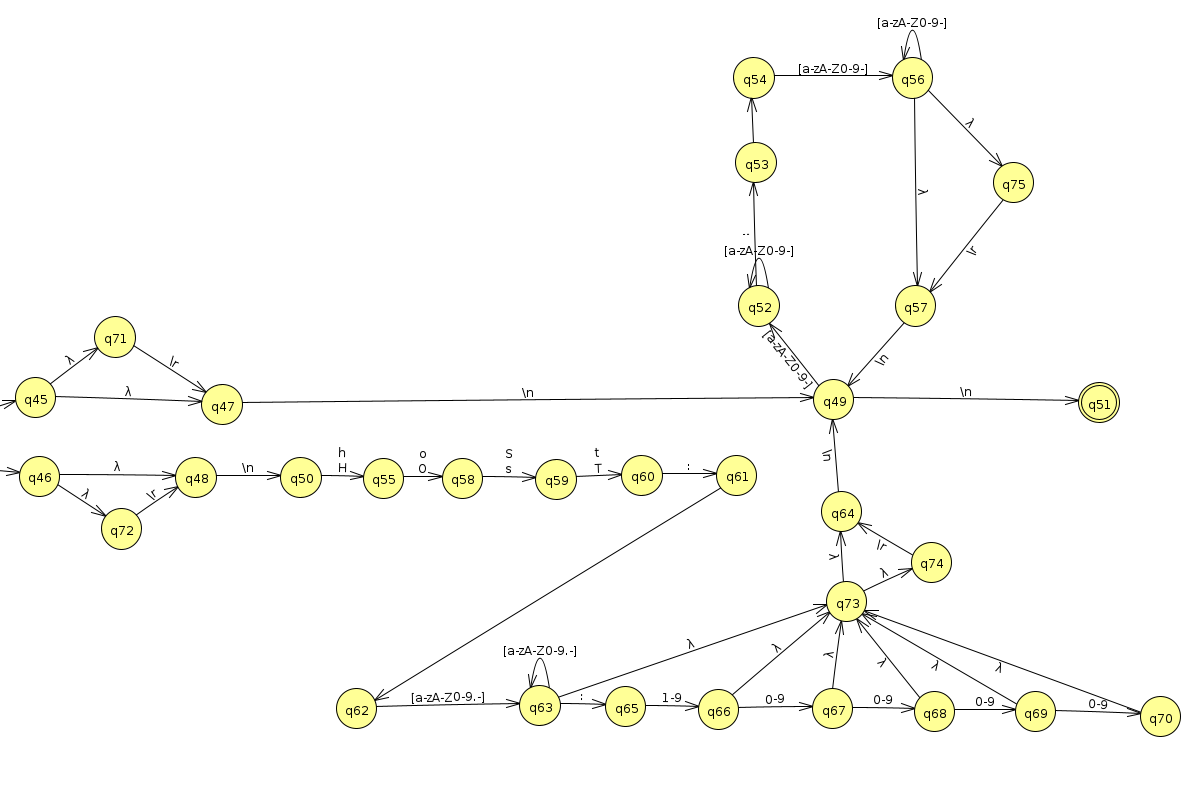

In [59]:
# Headers HTTP 1.0
delta['q47'] = {
    '\n': {'q49'}
}

header_key = set("0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ-.")
header_values = set("0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ-.:/(;.)*=_,+?")
t_q49 = {}
t_q52 = {}
t_q54 = {}
t_q56 = {}

for c in header_key:
    t_q49[c] = {'q52'}
    t_q52[c] = {'q52'}

for c in header_values:
    t_q54[c] = {'q56'}
    t_q56[c] = {'q56'}

t_q49['\n'] = {'qf'}
t_q52[':'] = {'q53'}
t_q56[''] = {'q57', 'q75'}

delta['q49'] = t_q49
delta['q52'] = t_q52
delta['q54'] = t_q54
delta['q56'] = t_q56

delta['q53'] = {
    ' ': {'q54'}
}

delta['q75'] = {
    '\r': {'q57'}
}

delta['q57'] = {
    '\n': {'q49'}
}

# Headers HTTP 1.1

In [60]:
# Finalização da implementação do automato
# Itera sobre todas as transições para adicionar os estados no set Q

for state, transitions in delta.items():
    if state not in Q:
        Q.add(state)
    
    for symbol, next_states in transitions.items():
        for next_state in next_states:
            if next_state.startswith('q') and next_state not in Q:
                Q.add(next_state)

automata = NFA(Q, sigma, delta, initial_state, f)

if automata.is_valid():
    print("O automato é válido")
    
    automata.view("http-headers-validator")

    from IPython.display import Image
    Image(filename='http-headers-validator.gv.png')


O automato é válido



(process:2786): Pango-CRITICAL **: 13:08:00.766: pango_cairo_show_layout: assertion 'PANGO_IS_LAYOUT (layout)' failed

(process:2786): Pango-CRITICAL **: 13:08:00.870: pango_cairo_show_layout: assertion 'PANGO_IS_LAYOUT (layout)' failed

(process:2786): Pango-CRITICAL **: 13:08:00.870: pango_cairo_show_layout: assertion 'PANGO_IS_LAYOUT (layout)' failed


### Implementação

Para fazer um teste prático do automato um cenário real será proposto.

De um lado um servidor Web que só aceitará chamadas em `HTTP/1.0` ou `HTTP/1.1` e que aceitará os métodos `HEAD` e `GET`.

Haverá um `client` que irá montar uma requisição `HTTP` manualmente seguindo o definido nas RFC's e validado pelo automato implementado e posteriormente irá realizar a requisição no servidor Web.

É esperado que caso o a requisição seja aceita pelo automato, também seja aceita pelo servidor Web que irá fazer o retorno da requisição.

**Obs.** Caso tenha problemas em executar o código utilizando o `Google Collab` recomendamos executar o código no `Jupyter` localmente, e, caso tenha algum problema com "Portas já em uso", trocar o número das portas em ambos seguintes códigos ou fazer o `restart` do Kernel do Jupyter.

In [1]:
# Código do servidor Web

from http.server import HTTPServer, BaseHTTPRequestHandler
import threading

class MyHTTPRequestHandler(BaseHTTPRequestHandler):
    def do_GET(self):
        # Check if the HTTP version is supported
        if self.protocol_version not in ['HTTP/1.0', 'HTTP/1.1']:
            self.send_error(505, "HTTP Version Not Supported")
            return
        
        # Send response with 200 OK
        self.send_response(200)
        self.end_headers()
        self.wfile.write(b"[Linguagens Formais e Automata]\nServidor Web Funcionando!")

# Set up the HTTP server
server_address = ('', 8003)  # Use any available interface on port 8000
httpd = HTTPServer(server_address, MyHTTPRequestHandler)
# Start the server in a separate thread

server_thread = threading.Thread(target=httpd.serve_forever)
server_thread.daemon = True
server_thread.start()

print('HTTP server running on port 8003...')

HTTP server running on port 8003...


In [61]:
import socket

def send_request(r):
    '''
    Realiza o envio da requisição HTTP via socket
    '''
    with socket.socket(socket.AF_INET, socket.SOCK_STREAM) as s:
        s.connect(('localhost', 8003))
        s.sendall(r.encode())
        response = s.recv(1024)
        print('Resposta da requisição:')
        print(response.decode())

        
# Utilizando HTTP 1.0
# Está separada em uma Tupla para facilitar no envio de socket além de ser mais legível a leitura
request_http_1_0 = (
    "GET / HTTP/1.0\r\n"
    "Host: localhost:8003\r\n"
    "Connection: close\r\n"
    "\n"
)

# Validação com o automato implementado
print("Validando a seguinte requisição HTTP 1.0")
print(request_http_1_0)
if automata.accept(request_http_1_0):
    print("A requisição HTTP 1.0 foi aceita pelo automato")
    print("Enviando a requisição para o servidor HTTP")
else:
    print("Requisição não foi aceita pelo automato")



# Define the HTTP request for HTTP/1.1
request_http_1_1 = (
    "GET / HTTP/1.1\r\n"
    "Host: localhost:8003\r\n"
    "Connection: close\r\n"
    "\n"
)

Validando a seguinte requisição HTTP 1.0
GET / HTTP/1.0
Host: localhost:8003
Connection: close


A requisição HTTP 1.0 foi aceita pelo automato
Enviando a requisição para o servidor HTTP


In [86]:
import socket
import ssl

def send_request_with_ssl(request, host, port):
    s = socket.socket(socket.AF_INET, socket.SOCK_STREAM)

    # socket com SSL/TLS
    ctx = ssl.SSLContext(ssl.PROTOCOL_TLSv1_2)

    ssl_sock = ctx.wrap_socket(s, server_hostname=host)
 
    ssl_sock.connect((host, port))
    
    ssl_sock.send(request.encode())

    response = b''
    while True:
        data = ssl_sock.recv(4096)
        if not data:
            break
        response += data

    print("Resposta da requisição")
    print(response.decode())

    # Fecha socket
    ssl_sock.close()


request_http = (
    "GET / HTTP/1.1\r\n"
    "Host: www.ufabc.edu.br\r\n"
    "User-Agent: Mozilla/5.0 (X11; Linux x86_64; rv:109.0) Gecko/20100101 Firefox/115.0\r\n"
    "Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,*/*;q=0.8\r\n"
    "Accept-Language: pt-BR,pt;q=0.8,en-US;q=0.5,en;q=0.3\r\n"
    "Accept-Encoding: gzip, deflate, br\r\n"
    "Referer: https://www.google.com/\r\n"
    "Connection: keep-alive\r\n"
    "Cookie: _ga=GA1.1.320516510.1625328328; _ga_C810D482LG=GS1.1.1707175485.6.1.1707176104.60.0.0; _ga_21H450NGNH=GS1.3.1695872057.4.0.1695872057.0.0.0\r\n"
    "Upgrade-Insecure-Requests: 1\r\n"
    "Sec-Fetch-Dest: document\r\n"
    "Sec-Fetch-Mode: navigate\r\n"
    "Sec-Fetch-Site: cross-site\r\n"
    "Sec-Fetch-User: ?1\r\n"
    "Pragma: no-cache\r\n"
    "Cache-Control: no-cache\r\n"
    "\r\n"
)

send_request_with_ssl(request_http, 'www.ufabc.edu.br', 443)

/tmp/ipykernel_1772/2756476344.py:8: DeprecationWarning: ssl.PROTOCOL_TLSv1_2 is deprecated
  ctx = ssl.SSLContext(ssl.PROTOCOL_TLSv1_2)


Resposta da requisição
HTTP/1.1 200 OK
Date: Sun, 31 Mar 2024 19:26:22 GMT
Server: Apache/2.4.6 (CentOS) OpenSSL/1.0.2k-fips PHP/7.4.30
Strict-Transport-Security: max-age=63072000
X-Frame-Options: SAMEORIGIN
X-Content-Type-Options: nosniff
X-Powered-By: PHP/7.4.30
Set-Cookie: b1e9d6db19590701f37f0c8922c899d3=sh0lmbnksmbae4biaarmf3k0h4; path=/; secure; HttpOnly
X-UA-Compatible: IE=edge,chrome=1
P3P: CP="NOI ADM DEV PSAi COM NAV OUR OTRo STP IND DEM"
Expires: Wed, 17 Aug 2005 00:00:00 GMT
Last-Modified: Sun, 31 Mar 2024 19:26:22 GMT
Cache-Control: no-store, no-cache, must-revalidate, post-check=0, pre-check=0
Pragma: no-cache
Keep-Alive: timeout=5, max=100
Connection: Keep-Alive
Transfer-Encoding: chunked
Content-Type: text/html; charset=utf-8

19aa0
<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7" lang="pt-br" dir="ltr"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8" lang="pt-br" dir="ltr"> <![endif]-->
<!--[if IE 8]>         <html c